# Домашнее задание. Урок 2. Keras

## Практическое задание

Используем набор примеров fashion-MNIST

1.  Опишите - какой результата получен в нейросети в зависимости от:
  -  числа нейронов в слое(для 2-хслойной сети),
  - числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых парметров).
  - фиксируйте для тренировочного и тестового набора метрики accuracy.
2.  Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1.Фиксируйте для тренировочного и тестового набора метрики accuracy.

3. Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе?

4. Для одного варианта сетей сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота , точность). Сделайте вывод.

## Загрузка данных Fashion_MNIST

In [2]:
import pandas as pd
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical


In [3]:
(train_imagef, train_labelf), (test_imagef, test_labelf) = fashion_mnist.load_data()

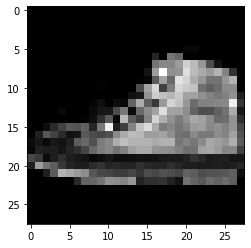

In [4]:
plt.imshow(train_imagef[5002, :, :])
plt.gray()
plt.show()

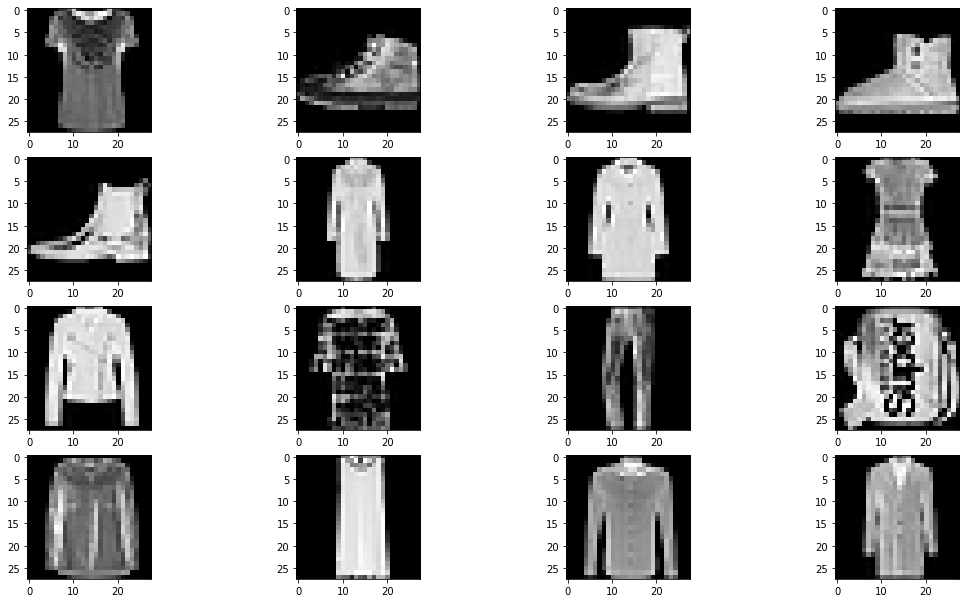

In [5]:
fig, axs = plt.subplots(4, 4)
fig.set_size_inches(18.5, 10.5)
m = 1
for i in range(4):
    for j in range(4):
        axs[i, j].imshow(train_imagef[5000 + m, :, :])
        m += 1

## Подготовка данных

In [6]:
# Normalize the images.
train_imagesi = (train_imagef / 127) - 1
test_imagesi = (test_imagef / 127) - 1

# Flatten the images.
train_images = train_imagesi.reshape((-1, 784))
test_images = test_imagesi.reshape((-1, 784))

print(train_images.shape)  # (60000, 784)
print(test_images.shape)  # (10000, 784)

(60000, 784)
(10000, 784)


In [7]:
train_cat_labels = to_categorical(train_labelf)
test_cat_labels = to_categorical(test_labelf)

In [8]:
keras.backend.backend()

'tensorflow'

## Построим простую модель для проверки работы алгоритмов keras

In [8]:
# Build the model.
model = Sequential([
    Dense(64, activation='tanh', input_shape=(784,)),
    Dense(64, activation='tanh'),  # Скрытый слой из 110 нейронов с активацией tanh
    Dense(10, activation='softmax'),
    # выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax
])

# Compile the model.
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Train the model.
history = model.fit(
    train_images, train_cat_labels,
    epochs=10, batch_size=1024, validation_split=0.2
)

Epoch 1/10
47/47 [==============================] - 1s 10ms/step - loss: 0.9540 - accuracy: 0.6961 - val_loss: 0.5932 - val_accuracy: 0.7948
Epoch 2/10
47/47 [==============================] - 0s 6ms/step - loss: 0.5222 - accuracy: 0.8207 - val_loss: 0.4847 - val_accuracy: 0.8255
Epoch 3/10
47/47 [==============================] - 0s 5ms/step - loss: 0.4450 - accuracy: 0.8464 - val_loss: 0.4342 - val_accuracy: 0.8460
Epoch 4/10
47/47 [==============================] - 0s 6ms/step - loss: 0.4110 - accuracy: 0.8560 - val_loss: 0.4147 - val_accuracy: 0.8536
Epoch 5/10
47/47 [==============================] - 0s 6ms/step - loss: 0.3846 - accuracy: 0.8639 - val_loss: 0.3946 - val_accuracy: 0.8607
Epoch 6/10
47/47 [==============================] - 0s 6ms/step - loss: 0.3669 - accuracy: 0.8711 - val_loss: 0.3814 - val_accuracy: 0.8643
Epoch 7/10
47/47 [==============================] - 0s 5ms/step - loss: 0.3547 - accuracy: 0.8733 - val_loss: 0.3755 - val_accuracy: 0.8659
Epoch 8/10
47/47 [=

In [11]:
history.history['accuracy'][-1]

0.8864791393280029

In [12]:
# Evaluate the model.
model.evaluate(test_images, test_cat_labels)

313/313 [==============================] - 0s 982us/step - loss: 0.3784 - accuracy: 0.8634


[0.37837231159210205, 0.8633999824523926]

In [13]:
# Predict on the first 5 test images.
predictions = model.predict(test_images[:5])

# Print our model's predictions.
print(np.argmax(predictions, axis=1))

# Check our predictions against the ground truths.
print(test_labelf[:5])

[9 2 1 1 6]
[9 2 1 1 6]


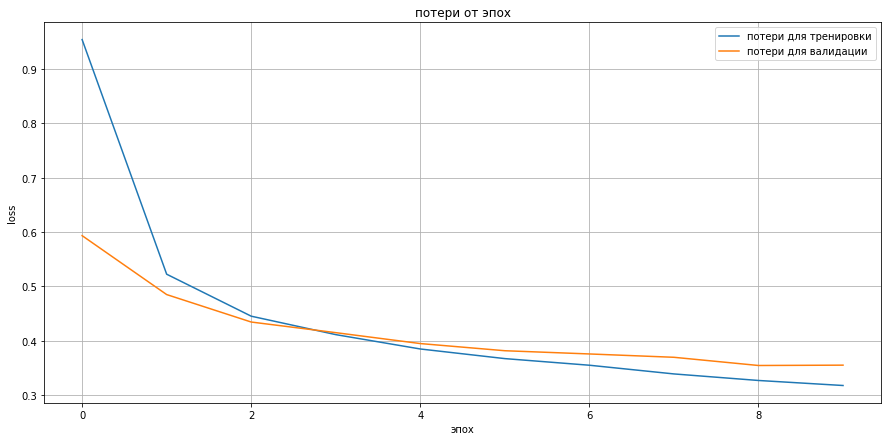

In [14]:
plt.figure(figsize=(15, 7))
plt.plot(history.history['loss'], label='потери для тренировки')
plt.plot(history.history['val_loss'], label='потери для валидации')
plt.xlabel('эпох')
plt.ylabel('loss')
plt.legend()
plt.grid('On')
plt.title('потери от эпох')
plt.show()

**Вывод**
> построили простую модель и провели обучение

## 1.1. Анализ качества сети от количества нейронов

In [16]:
arr_accuracy = []
epochs = 20
for num_neuro in list(range(1, 10)) + list(range(10, 70, 10)):
    model = Sequential([
        Dense(num_neuro, activation='relu', input_shape=(784,)),
        Dense(10, activation='softmax'),
    ])
    model.compile(optimizer='NAdam', loss='categorical_crossentropy', metrics=['accuracy'])

    # проводим обучение модели
    history = model.fit(
        train_images,
        train_cat_labels,
        epochs=epochs,
        batch_size=1024, validation_split=0.2, verbose=0
    )
    accuracy_train = history.history['accuracy'][-1]
    _, accuracy_test = model.evaluate(test_images, test_cat_labels)
    arr_accuracy.append([num_neuro, accuracy_train, accuracy_test])
    print(f' N нейронов {num_neuro}, Точность трен {accuracy_train:.3}, Точность тест {accuracy_test:.3}')


313/313 [==============================] - 0s 842us/step - loss: 1.8020 - accuracy: 0.2488
 N нейронов 1, Точность трен 0.248, Точность тест 0.249
313/313 [==============================] - 0s 857us/step - loss: 1.3256 - accuracy: 0.4458
 N нейронов 2, Точность трен 0.451, Точность тест 0.446
313/313 [==============================] - 0s 851us/step - loss: 0.8820 - accuracy: 0.7125
 N нейронов 3, Точность трен 0.715, Точность тест 0.712
313/313 [==============================] - 0s 762us/step - loss: 0.6778 - accuracy: 0.7734
 N нейронов 4, Точность трен 0.778, Точность тест 0.773
313/313 [==============================] - 0s 818us/step - loss: 0.5464 - accuracy: 0.8101
 N нейронов 5, Точность трен 0.827, Точность тест 0.81
313/313 [==============================] - 0s 1ms/step - loss: 0.5199 - accuracy: 0.8192
 N нейронов 6, Точность трен 0.832, Точность тест 0.819
313/313 [==============================] - 0s 710us/step - loss: 0.4922 - accuracy: 0.8280
 N нейронов 7, Точность трен 0

In [17]:
arr_accuracy

[[1, 0.24795833230018616, 0.24879999458789825],
 [2, 0.4507708251476288, 0.4458000063896179],
 [3, 0.7145833373069763, 0.7124999761581421],
 [4, 0.7775416374206543, 0.7734000086784363],
 [5, 0.8272500038146973, 0.8101000189781189],
 [6, 0.8322499990463257, 0.8191999793052673],
 [7, 0.8451458215713501, 0.828000009059906],
 [8, 0.8487291932106018, 0.8292999863624573],
 [9, 0.8510000109672546, 0.8327000141143799],
 [10, 0.8576874732971191, 0.8410000205039978],
 [20, 0.872083306312561, 0.8539000153541565],
 [30, 0.8788958191871643, 0.8605999946594238],
 [40, 0.8875625133514404, 0.8639000058174133],
 [50, 0.8849791884422302, 0.8528000116348267],
 [60, 0.893666684627533, 0.8659999966621399]]

In [18]:
import pandas as pd

pd.DataFrame(arr_accuracy, columns=['#neuro', 'accuracy_tren', 'accuracy_test'])

,#neuro,accuracy_tren,accuracy_test
0,1,0.247958,0.2488
1,2,0.450771,0.4458
2,3,0.714583,0.7125
3,4,0.777542,0.7734
4,5,0.827250,0.8101
5,6,0.832250,0.8192
6,7,0.845146,0.8280
7,8,0.848729,0.8293
8,9,0.851000,0.8327
9,10,0.857687,0.8410


### Вывод

> Приемлемые результаты (0.78/0.78) обучения модели анализу образов получены уже при количестве нейронов = 4

> Насыщение в обучении наступает при количестве нейронов 30-40 (0.89/0.86). Дальнейшее обучение при этом не приносит сильных результатов

## 1.2 Анализ качества модели от числа слоев

создадим функцию, которая будет создавать необходимое количество слоем, при этом сохраняю количество параметров примерно равным

In [9]:
# Создание модели в зависимости от количества слоев
# Dense Layers
# We have two Dense layers in our model. The calculation of the parameter numbers uses the following formula.
# param_number = output_channel_number * (input_channel_number + 1)

def build_model_layer(layers):
    model = Sequential(name='my_model3')
    model.add(Dense(10, activation='relu', input_shape=(784,)))
    for k in range(layers):
        model.add(Dense(16 - layers, activation='tanh'))
    model.add(Dense(10, activation='softmax'))
    return model

Проверим количество  параметров при создании различных сетей

In [10]:
def print_str(str):
    if 'Total params:' in str:
        print(str)


for layers in [2, 3, 5, 10]:
    build_model_layer(layers).summary(print_fn=print_str)

Total params: 8,364
Total params: 8,497
Total params: 8,619
Total params: 8,364


In [16]:
def teaching(epochs=10, layers=2, optimizer='NAdam'):
    model = build_model_layer(layers)

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # проводим обучение модели
    history = model.fit(
        train_images,
        train_cat_labels,
        epochs=epochs,
        batch_size=1024, validation_split=0.2, verbose=0
    )
    accuracy_train = history.history['accuracy'][-1]
    _, accuracy_test = model.evaluate(test_images, test_cat_labels)
    print(
        f' Оптимизатор {optimizer}, N слоев {layers}, Точность трен {accuracy_train:.3}, Точность тест {accuracy_test:.3}')
    return [optimizer, layers, accuracy_train, accuracy_test]

In [18]:
arr_accuracy = []
for layers in [2, 3, 5, 10]:
    arr_accuracy.append(teaching(epochs=20, layers=layers))
pd.DataFrame(arr_accuracy, columns=['optimizer', '#layers', 'accuracy_tren', 'accuracy_test'])

313/313 [==============================] - 0s 603us/step - loss: 0.4916 - accuracy: 0.8321
 Оптимизатор NAdam, N слоев 2, Точность трен 0.858, Точность тест 0.832
313/313 [==============================] - 0s 603us/step - loss: 0.4803 - accuracy: 0.8388
 Оптимизатор NAdam, N слоев 3, Точность трен 0.859, Точность тест 0.839
313/313 [==============================] - 0s 599us/step - loss: 0.4878 - accuracy: 0.8385
 Оптимизатор NAdam, N слоев 5, Точность трен 0.862, Точность тест 0.839
313/313 [==============================] - 0s 659us/step - loss: 0.7971 - accuracy: 0.7400
 Оптимизатор NAdam, N слоев 10, Точность трен 0.767, Точность тест 0.74


,optimizer,#layers,accuracy_tren,accuracy_test
0,NAdam,2,0.857521,0.8321
1,NAdam,3,0.859438,0.8388
2,NAdam,5,0.862083,0.8385
3,NAdam,10,0.767042,0.7400


### Вывод
> Количество слоев улучшает качество модели, однако для модели с количеством слоев 10 обучения в течение 20 эпох оказалось не достаточным

## 2. Анализ качества модели в зависимости от оптимизатора

In [19]:
arr_accuracy = []
for optimizer in ['SGD', 'Adam', 'RMSProp']:
    arr_accuracy.append(teaching(optimizer=optimizer, epochs=20, layers=4))
pd.DataFrame(arr_accuracy, columns=['optimizer', '#layers', 'accuracy_tren', 'accuracy_test'])


313/313 [==============================] - 0s 648us/step - loss: 1.0132 - accuracy: 0.7066
 Оптимизатор SGD, N слоев 4, Точность трен 0.706, Точность тест 0.707
313/313 [==============================] - 0s 587us/step - loss: 0.4913 - accuracy: 0.8394
 Оптимизатор Adam, N слоев 4, Точность трен 0.861, Точность тест 0.839
313/313 [==============================] - 0s 595us/step - loss: 0.5050 - accuracy: 0.8289
 Оптимизатор RMSProp, N слоев 4, Точность трен 0.847, Точность тест 0.829


,optimizer,#layers,accuracy_tren,accuracy_test
0,SGD,4,0.706062,0.7066
1,Adam,4,0.860542,0.8394
2,RMSProp,4,0.847438,0.8289


### Вывод

> Наиболее точной получилась модель при использовании оптимизатора **Adam**

## 3. Получение оптимальной модели

### Вывод

> Общее правило для предметной области: необходимо ограничить количество нейронов и слоев. Оба параметра влияют на скорость обучения

> При большом количестве слоев необходимо повышать количество эпох, иначе модель будет недообученной

> При большом количестве слоем наступает насыщение и дальнейшее обучение не происходит

## 4. Построим матрицу ошибок

### Описание предметов в наборе

Label	Description
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot

In [21]:
layers = 4
optimizer = 'Adam'
epochs = 200
model = build_model_layer(layers)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# проводим обучение модели
history = model.fit(
    train_images,
    train_cat_labels,
    epochs=epochs,
    batch_size=1024, validation_split=0.2, verbose=0
)
accuracy_train = history.history['accuracy'][-1]
_, accuracy_test = model.evaluate(test_images, test_cat_labels)
print(
    f' Оптимизатор {optimizer}, N слоев {layers}, Точность трен {accuracy_train:.3}, Точность тест {accuracy_test:.3}')

313/313 [==============================] - 0s 607us/step - loss: 0.4747 - accuracy: 0.8475
 Оптимизатор Adam, N слоев 4, Точность трен 0.904, Точность тест 0.848


In [22]:
# Predict on the first 5 test images.
predictions = model.predict(test_images[:5])

# Print our model's predictions.
print(np.argmax(predictions, axis=1))

# Check our predictions against the ground truths.
print(test_labelf[:5])

[9 2 1 1 6]
[9 2 1 1 6]


In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [24]:
predictions_all = np.argmax(model.predict(test_images), axis=1)

In [27]:
confusion_matrix = confusion_matrix(test_labelf, predictions_all)
print(confusion_matrix)

[[800   0  19  37   2   0 128   0  14   0]
 [  3 959   4  28   2   0   4   0   0   0]
 [  8   8 785  11  95   0  89   0   4   0]
 [ 45  15  17 842  36   1  33   1  10   0]
 [  1   1 128  38 743   0  87   0   2   0]
 [  1   0   0   1   0 935   0  30   7  26]
 [148   2 110  35  59   0 626   0  20   0]
 [  0   0   0   0   0  50   0 909   1  40]
 [  6   1  10   8   5  11  15   8 936   0]
 [  0   0   0   1   0  15   0  43   1 940]]


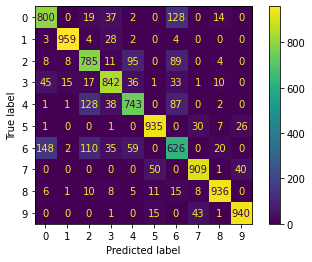

In [58]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=np.arange(10))

disp.plot(values_format='.3g')
plt.show()

In [49]:
def plot_by_index(arr, images):
    fig, axs = plt.subplots(4, 4)
    fig.set_size_inches(18.5, 10.5)
    m = len(arr)
    for i in range(4):
        for j in range(4):
            axs[i, j].imshow(images[arr[m-1], :, :])
            m -= 1
            if m < 0:
                break
        if m < 0:
            break


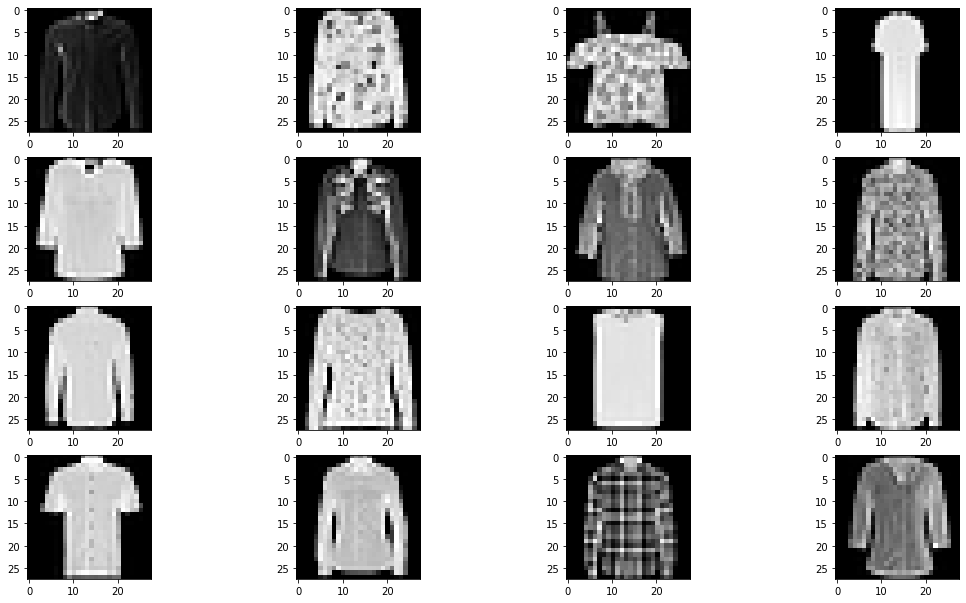

In [52]:
plot_by_index(np.where(test_labelf == 6)[0][0:16],test_imagef)

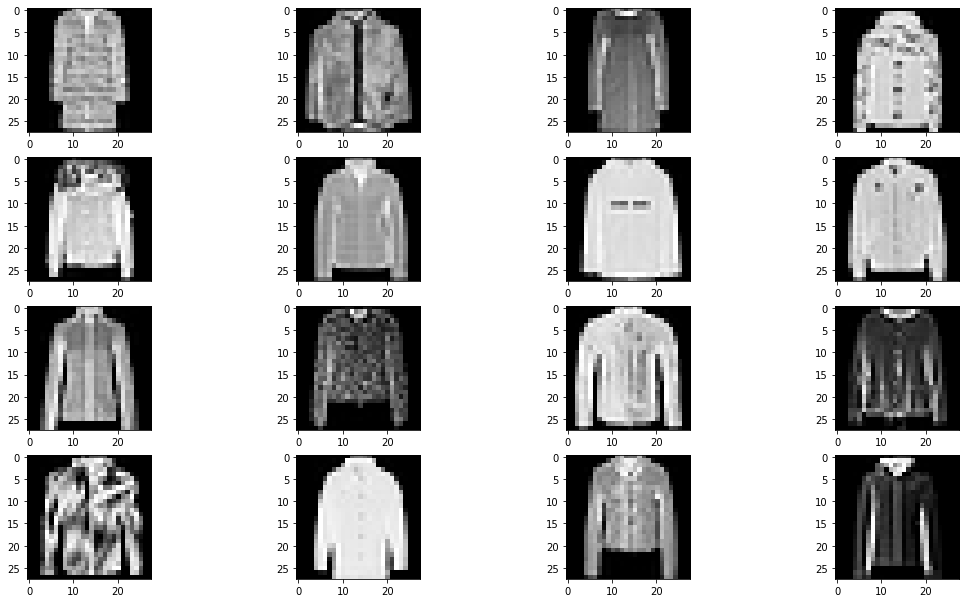

In [53]:
plot_by_index(np.where(test_labelf == 4)[0][0:16],test_imagef)

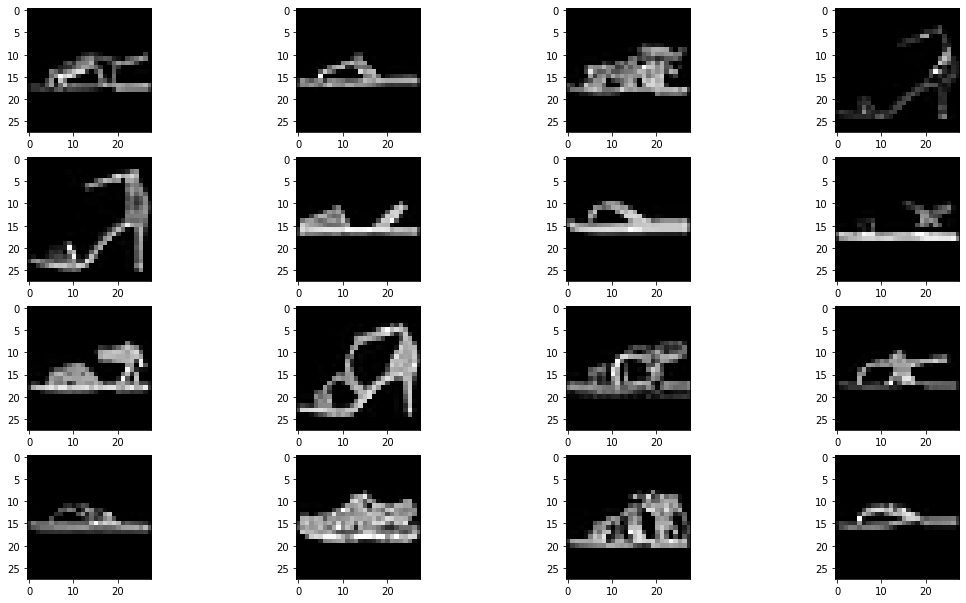

In [54]:
plot_by_index(np.where(test_labelf == 5)[0][0:16],test_imagef)

### Вывод

>Наиболее трудно различимыми являются наборы с индексами 6-Shirt и 4-Coat

> Меньше всего ошибок наблюдается у индексов 1-Trouser и 8-Bag